In [1]:
import pandas as pd

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns, numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile

In [11]:
df=pd.read_excel('TIME TRACKING TEST/Copy of Report Time Tracking Salesman REV (2).xlsx',sheet_name='Report Time Tracking Salesman')
df.head()

,DOMAIN CODE,DOMAIN NAME,REGIONAL CODE,REGIONAL NAME,AO GROUP CODE,AO GROUP NAME,OU CODE,OU NAME,SUBCHANNEL,WEEK,...,DURASI ANTAR OUTLET (MENIT),LONGEST IDLE (MENIT),DURASI AKHIR PERJALANAN,TOTAL WORK TIME,PLAN CALL,ACTUAL CALL,SALESMAN NIK,SALESMAN NAME,KUNJUNGAN OUTLET PERTAMA,KUNJUNGAN OUTLET TERAKHIR
0,JWA,JAVA,JBT,BANDUNG,BDG,BANDUNG,BDG,BANDUNG,MD,2012,...,99.900,32.817,26.117,474.433,11.0,9.0,131694.0,FAJAR SIDDIQ,2020-03-18 07:40:46,2020-03-18 14:42:41
1,JWA,JAVA,JBT,BANDUNG,BDG,BANDUNG,BDG,BANDUNG,MD,2012,...,99.033,32.033,9.067,347.767,15.0,8.0,131961.0,DIKI KURNIA,2020-03-18 12:07:17,2020-03-18 17:21:18
2,JWA,JAVA,JBT,BANDUNG,BDG,BANDUNG,BDG,BANDUNG,MD,2012,...,153.133,102.883,102.083,539.450,10.0,8.0,131518.0,NUR ARIF,2020-03-18 12:15:52,2020-03-18 18:53:58
3,JWA,JAVA,JBT,BANDUNG,BDG,BANDUNG,BDG,BANDUNG,MD,2012,...,400.617,125.617,55.150,532.350,13.0,12.0,131546.0,FARHAT,2020-03-20 12:37:00,2020-03-20 19:43:35
4,JWA,JAVA,JBT,BANDUNG,BDG,BANDUNG,BDG,BANDUNG,MD,2012,...,125.900,59.533,57.067,458.267,15.0,15.0,132323.0,HENDI RAMA PERMADI,2020-03-18 07:24:22,2020-03-18 13:41:25


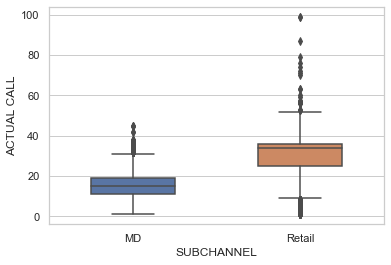

In [19]:
sns.set(style='whitegrid')

ax= sns.boxplot(x='SUBCHANNEL',y='ACTUAL CALL',data=df,width=0.5)

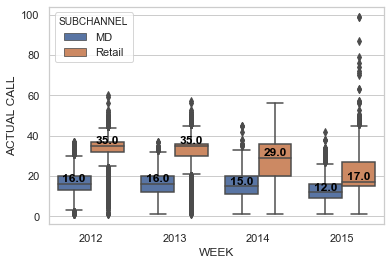

In [57]:
ax2 = sns.boxplot(x="WEEK", y="ACTUAL CALL", hue="SUBCHANNEL",data=df)
m1 = df.groupby(['WEEK','SUBCHANNEL'])['ACTUAL CALL'].median().values
mL1=[str(np.round(s,2)) for s in median]

ind = 0
for tick in range(len(ax2.get_xticklabels())):
    ax2.text(tick+.2, m1[ind+1]+1, mL1[ind+1],  horizontalalignment='center',  color='black', weight='semibold')
    ax2.text(tick-.2, m1[ind]+1, mL1[ind], horizontalalignment='center', color='black', weight='semibold')
    ind += 2    
plt.show()


In [99]:
tes=df['AO GROUP NAME']=='MOJOKERTO'
print (tes.head())

0    False
1    False
2    False
3    False
4    False
Name: AO GROUP NAME, dtype: bool


In [104]:
tes_2002 = df[tes]
print(tes_2002.shape)
print (tes_2002.head())

(1522, 26)
      DOMAIN CODE DOMAIN NAME REGIONAL CODE REGIONAL NAME AO GROUP CODE  \
10310         JWA        JAVA           JTR      SURABAYA           MJO   
10311         JWA        JAVA           JTR      SURABAYA           MJO   
10312         JWA        JAVA           JTR      SURABAYA           MJO   
10313         JWA        JAVA           JTR      SURABAYA           MJO   
10314         JWA        JAVA           JTR      SURABAYA           MJO   

      AO GROUP NAME OU CODE     OU NAME SUBCHANNEL  WEEK  ...  \
10310     MOJOKERTO     BJO  BOJONEGORO         MD  2012  ...   
10311     MOJOKERTO     BJO  BOJONEGORO         MD  2012  ...   
10312     MOJOKERTO     BJO  BOJONEGORO         MD  2012  ...   
10313     MOJOKERTO     BJO  BOJONEGORO         MD  2012  ...   
10314     MOJOKERTO     BJO  BOJONEGORO         MD  2012  ...   

       DURASI AWAL PERJALANAN (MENIT)  DURASI CALL OUTLET (MENIT)  \
10310                           3.383                     395.600   
10311    

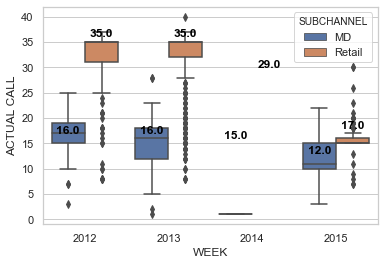

In [105]:
ax2 = sns.boxplot(x="WEEK", y="ACTUAL CALL", hue="SUBCHANNEL",data=tes_2002)
m1 = df.groupby(['WEEK','SUBCHANNEL'])['ACTUAL CALL'].median().values
mL1=[str(np.round(s,2)) for s in median]

ind = 0
for tick in range(len(ax2.get_xticklabels())):
    ax2.text(tick+.2, m1[ind+1]+1, mL1[ind+1],  horizontalalignment='center',  color='black', weight='semibold')
    ax2.text(tick-.2, m1[ind]+1, mL1[ind], horizontalalignment='center', color='black', weight='semibold')
    ind += 2    
plt.show()


In [63]:
from scipy import stats

z=np.abs(stats.zscore(df['TOTAL WORK TIME']))
print(z)

[0.06042552 0.06034596 0.06046636 ... 0.06045918 0.06050843 0.06143405]


In [64]:
threshold=3
print (np.where(z>3))

(array([ 5242,  9833, 11097, 11098, 11099, 11109, 11157, 11158, 11159,
       11163, 11176, 11182, 11183, 11187, 11323, 11324, 11325, 11326,
       11327, 11328, 11329, 11330, 12169, 12247, 12296, 12351, 12964,
       12965, 13082, 13083, 13084, 13085, 13086, 13090, 13091, 13182,
       13204, 13205, 13206, 13207, 19400, 19401, 19402, 19403, 19404,
       19494, 19508, 19523, 19524, 19525, 25210, 25211, 25224, 25225,
       25226, 25273, 25274, 25324, 25325, 25338, 25938, 25984, 25985,
       26027, 26088, 26089, 27490, 28059, 28073, 28175, 28176, 30750,
       30751, 31327, 31328, 31329, 31405, 31441, 31493, 33384, 33385,
       33386, 33434, 35271, 36669, 36670, 36671, 36672, 36673, 36768,
       36785, 36786, 38729, 38730, 38731, 38732, 38733, 38734, 38735,
       38736, 38737, 38791, 38792, 38793, 38816, 38821, 38822, 38823,
       38824, 38825, 38830, 38836, 38837, 38927, 38928, 38929, 38932,
       38933, 38934, 38935, 38936, 38937, 38941, 38942, 38943, 38944,
       38945, 38946

In [76]:
from matplotlib.dates import date2num


In [88]:
df.drop(['MULAI PERJALAN','AKHIR PERJALAN','KUNJUNGAN OUTLET PERTAMA','KUNJUNGAN OUTLET TERAKHIR'],axis=1,inplace=True)

In [93]:
dfo=list(df.columns)
dfo.remove('DOMAIN CODE','DOMAIN NAME','REGIONAL CODE')

DOMAIN CODE                        object
DOMAIN NAME                        object
REGIONAL CODE                      object
REGIONAL NAME                      object
AO GROUP CODE                      object
AO GROUP NAME                      object
OU CODE                            object
OU NAME                            object
SUBCHANNEL                         object
WEEK                                int64
TERRITORY CODE                      int64
DISTRICT CODE                       int64
ROUTE CODE                          int64
ROUTE NAME                         object
KM AWAL                             int64
KM AKHIR                            int64
DURASI AWAL PERJALANAN (MENIT)    float64
DURASI CALL OUTLET (MENIT)        float64
DURASI ANTAR OUTLET (MENIT)       float64
LONGEST IDLE (MENIT)              float64
DURASI AKHIR PERJALANAN           float64
TOTAL WORK TIME                   float64
PLAN CALL                         float64
ACTUAL CALL                       

In [92]:
df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

TypeError: can only concatenate str (not "float") to str